In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive

drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [4]:
dataset_address = 'drive/MyDrive/Car_prices_classification.csv'
df = pd.read_csv(dataset_address)
df

,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price_class
0,0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,3
1,1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,4
2,2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,2
3,3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,2
4,4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,3
...,...,...,...,...,...,...,...,...,...,...,...
117922,117922,volvo,xc-90,gen-ii-2014-xc-90,2020,40000,1969,Hybrid,Katowice,Śląskie,5
117923,117923,volvo,xc-90,gen-ii-2014-xc-90,2017,51000,1969,Diesel,Chechło Pierwsze,Łódzkie,5
117924,117924,volvo,xc-90,gen-ii-2014-xc-90,2016,83500,1969,Gasoline,Pruszcz Gdański,Pomorskie,5
117925,117925,volvo,xc-90,gen-ii-2014-xc-90,2017,174000,1969,Diesel,Kalisz,Wielkopolskie,5


In [5]:
df.isnull().sum()

Unnamed: 0             0
mark                   0
model                  0
generation_name    30085
year                   0
mileage                0
vol_engine             0
fuel                   0
city                   0
province               0
price_class            0
dtype: int64

In [6]:
del df['generation_name']
del df['city']
del df['province']
del df['Unnamed: 0']
df

,mark,model,year,mileage,vol_engine,fuel,price_class
0,opel,combo,2015,139568,1248,Diesel,3
1,opel,combo,2018,31991,1499,Diesel,4
2,opel,combo,2015,278437,1598,Diesel,2
3,opel,combo,2016,47600,1248,Diesel,2
4,opel,combo,2014,103000,1400,CNG,3
...,...,...,...,...,...,...,...
117922,volvo,xc-90,2020,40000,1969,Hybrid,5
117923,volvo,xc-90,2017,51000,1969,Diesel,5
117924,volvo,xc-90,2016,83500,1969,Gasoline,5
117925,volvo,xc-90,2017,174000,1969,Diesel,5


In [7]:
#one hot encoding
mark = pd.get_dummies(df['mark'])
df = pd.concat([df,mark],axis=1)

model = pd.get_dummies(df['model'])
df = pd.concat([df,model],axis=1)

fuel = pd.get_dummies(df['fuel'])
df = pd.concat([df,fuel],axis=1)

df

,mark,model,year,mileage,vol_engine,fuel,price_class,alfa-romeo,audi,bmw,...,yaris,yeti,zafira,zoe,CNG,Diesel,Electric,Gasoline,Hybrid,LPG
0,opel,combo,2015,139568,1248,Diesel,3,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,opel,combo,2018,31991,1499,Diesel,4,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,opel,combo,2015,278437,1598,Diesel,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,opel,combo,2016,47600,1248,Diesel,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,opel,combo,2014,103000,1400,CNG,3,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117922,volvo,xc-90,2020,40000,1969,Hybrid,5,0,0,0,...,0,0,0,0,0,0,0,0,1,0
117923,volvo,xc-90,2017,51000,1969,Diesel,5,0,0,0,...,0,0,0,0,0,1,0,0,0,0
117924,volvo,xc-90,2016,83500,1969,Gasoline,5,0,0,0,...,0,0,0,0,0,0,0,1,0,0
117925,volvo,xc-90,2017,174000,1969,Diesel,5,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
del df['mark']
del df['model']
del df['fuel']

In [9]:
from sklearn.preprocessing import StandardScaler
df[['year', 'mileage', 'vol_engine']] = StandardScaler().fit_transform(df[['year', 'mileage', 'vol_engine']])
df

,year,mileage,vol_engine,price_class,alfa-romeo,audi,bmw,chevrolet,citroen,fiat,...,yaris,yeti,zafira,zoe,CNG,Diesel,Electric,Gasoline,Hybrid,LPG
0,0.364622,-0.015252,-0.876396,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.891853,-1.179896,-0.486409,4,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.364622,1.488164,-0.332589,2,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.540366,-1.010911,-0.876396,2,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.188879,-0.411142,-0.640228,3,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117922,1.243340,-1.093190,0.243846,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
117923,0.716109,-0.974102,0.243846,5,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
117924,0.540366,-0.622252,0.243846,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
117925,0.716109,0.357514,0.243846,5,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(['price_class'],axis=1)
y = df['price_class']
#80-20
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Fit logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8123463071313491


In [22]:
print("Accuracy:", accuracy*100,'%')

Accuracy: 81.23463071313492 %


In [23]:
#implementation



def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, theta):
    m = y.size
    h = sigmoid(X @ theta)
    J = -1 / m * (y @ np.log(h) + (1 - y) @ np.log(1 - h))
    grad = 1 / m * X.T @ (h - y)
    return J, grad

def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.size
    J_history = np.zeros(num_iters)

    for i in range(num_iters):
        cost, grad = cost_function(X, y, theta)
        theta -= alpha * grad
        J_history[i] = cost

    return theta, J_history

# Initialize parameters to zeros
theta = np.zeros(360)

# Set hyperparameters
alpha = 0.1
num_iters = 1000

# Train logistic regression model
theta, J_history = gradient_descent(X_train, y_train, theta, alpha, num_iters)

# Make predictions on test data
y_pred = sigmoid(X_test @ theta)
y_pred = y_pred >= 0.5

# Calculate accuracy on test set
accuracy2 = np.mean(y_pred == y_test) *100
print("Accuracy:", accuracy2,'%')


/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Accuracy: 5.350631730687696 %


In [34]:
import numpy as np
from scipy.optimize import fmin_tnc


class my_class:

    @staticmethod
    def sigmoid(x):
        # Activation function used to map any real value between 0 and 1
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def net_input(theta, x):
        # Computes the weighted sum of inputs Similar to Linear Regression

        return np.dot(x, theta)

    def probability(self, theta, x):
        # Calculates the probability that an instance belongs to a particular class

        return self.sigmoid(self.net_input(theta, x))

    def cost_function(self, theta, x, y):
        # Computes the cost function for all the training samples
        m = x.shape[0]
        total_cost = -(1 / m) * np.sum(
            y * np.log(self.probability(theta, x)) + (1 - y) * np.log(
                1 - self.probability(theta, x)))
        return total_cost

    def gradient(self, theta, x, y):
        # Computes the gradient of the cost function at the point theta
        m = x.shape[0]
        return (1 / m) * np.dot(x.T, self.sigmoid(self.net_input(theta, x)) - y)

    def fit(self, x, y, theta):
        opt_weights = fmin_tnc(func=self.cost_function, x0=theta, fprime=self.gradient,
                               args=(x, y.flatten()))
        self.w_ = opt_weights[0]
        return self

    def predict(self, x):
        theta = self.w_[:, np.newaxis]
        return self.probability(theta, x)

    def accuracy(self, x, actual_classes, probab_threshold=0.5):
        predicted_classes = (self.predict(x) >= probab_threshold).astype(int)
        predicted_classes = predicted_classes.flatten()
        accuracy = np.mean(predicted_classes == actual_classes)
        return accuracy * 100

X = df.drop(['price_class'],axis=1)
y = df['price_class']

    # filter out the applicants that got admitted
admitted = df.loc[y == 1]

    # filter out the applicants that din't get admission
not_admitted = df.loc[y == 0]

    # preparing the data for building the model

X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))

    # Logistic Regression from scratch using Gradient Descent
model = my_class()
model.fit(X, y, theta)
accuracy = model.accuracy(X, y.flatten())
parameters = model.w_
print("accuracy",accuracy,'%')

x_values = [np.min(X[:, 1] - 2), np.max(X[:, 2] + 2)]
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

<ipython-input-34-9573258159f9>:64: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
<ipython-input-34-9573258159f9>:27: RuntimeWarning: divide by zero encountered in log
  y * np.log(self.probability(theta, x)) + (1 - y) * np.log(
<ipython-input-34-9573258159f9>:27: RuntimeWarning: invalid value encountered in multiply
  y * np.log(self.probability(theta, x)) + (1 - y) * np.log(


accuracy 19.412009124288755 %


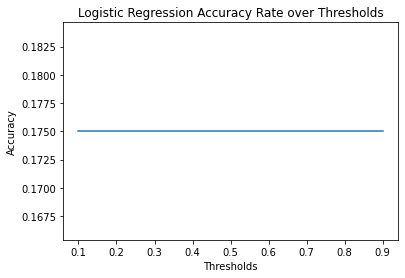

In [37]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
accuracy_scores = []
for threshold in thresholds:
    y_pred_thresh = [1 if proba >= threshold else 0 for proba in y_pred]
    accuracy = accuracy_score(y_test, y_pred_thresh)
    accuracy_scores.append(accuracy)

# Plot accuracy scores over different threshold values
plt.plot(thresholds, accuracy_scores)
plt.title('Logistic Regression Accuracy Rate over Thresholds')
plt.xlabel('Thresholds')
plt.ylabel('Accuracy')
plt.show()

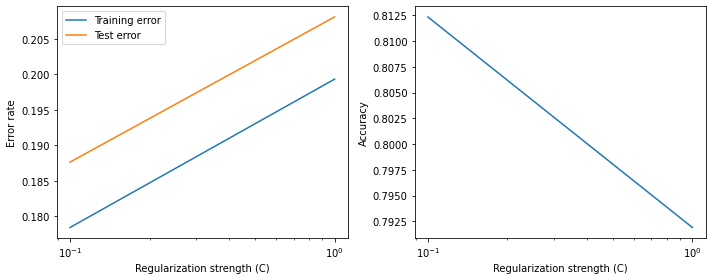

Final accuracy score: 0.7919104553548715


In [41]:
model = LogisticRegression(max_iter=1000)
# Train model for decreasing values of regularization strength (C)
C_values = [10 ** i for i in range(-1, 1)]
train_errors = []
test_errors = []
accuracies = []
for C in reversed(C_values):
    model.set_params(C=C)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_error = 1 - accuracy_score(y_train, train_pred)
    test_error = 1 - accuracy_score(y_test, test_pred)
    accuracy = accuracy_score(y_test, test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
    accuracies.append(accuracy)

# Plot graphs of error reduction and increasing accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(C_values, train_errors, label='Training error')
plt.plot(C_values, test_errors, label='Test error')
plt.xscale('log')
plt.xlabel('Regularization strength (C)')
plt.ylabel('Error rate')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(C_values, accuracies)
plt.xscale('log')
plt.xlabel('Regularization strength (C)')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

# Report final score
print('Final accuracy score:', accuracies[-1])